In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset
data = pd.read_csv("C:\\Users\\satwi\\Desktop\\Feynn Internship\\EV_States.csv")

In [3]:
#Getting Insights about the Dataset
print(data.head(10))

   Sr. No.                State Name Total Electric Vehicle  \
0        1  Andaman & Nicobar Island                    162   
1        2             Andra Pradesh                    NaN   
2        3         Arunachal Pradesh                     20   
3        4                     Assam                  64766   
4        5                     Bihar                  83335   
5        6                Chandigarh                   2812   
6        7              Chhattisgarh                  20966   
7        8                     Delhi               1,56,393   
8        9                       Goa                   3870   
9       10                   Gujarat                  45272   

  Total Non-Electric Vehicle        Total  
0                   1,46,945     1,47,107  
1                        NaN          NaN  
2                   2,52,965     2,52,985  
3                  46,77,053    47,41,819  
4                1,04,07,078  1,04,90,413  
5                   7,46,881     7,49,693 

In [4]:
#Some more information about Dataset
print("Dataset Shape:", data.shape)

data.info()

print("Summary Statistics:",data.describe())

#Number of unique values in each column
unique_value_counts = data.nunique()
print("Number of Unique Values in Each Column:",unique_value_counts)

#Check for duplicate rows in the dataset
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows:",duplicate_rows)

Dataset Shape: (36, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sr. No.                     36 non-null     int64 
 1   State Name                  36 non-null     object
 2   Total Electric Vehicle      32 non-null     object
 3   Total Non-Electric Vehicle  32 non-null     object
 4   Total                       32 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB
Summary Statistics:          Sr. No.
count  36.000000
mean   18.500000
std    10.535654
min     1.000000
25%     9.750000
50%    18.500000
75%    27.250000
max    36.000000
Number of Unique Values in Each Column: Sr. No.                       36
State Name                    36
Total Electric Vehicle        31
Total Non-Electric Vehicle    32
Total                         32
dtype: int64
Duplicate Rows: Empty DataFrame
Columns: [

In [5]:
# Convert object columns to int64
data['Total Electric Vehicle'] = pd.to_numeric(data['Total Electric Vehicle'], errors='coerce').fillna(0).astype(int)
data['Total Non-Electric Vehicle'] = pd.to_numeric(data['Total Non-Electric Vehicle'], errors='coerce').fillna(0).astype(int)
data['Total'] = pd.to_numeric(data['Total'], errors='coerce').fillna(0).astype(int)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sr. No.                     36 non-null     int64 
 1   State Name                  36 non-null     object
 2   Total Electric Vehicle      36 non-null     int32 
 3   Total Non-Electric Vehicle  36 non-null     int32 
 4   Total                       36 non-null     int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
print(data.columns)

Index(['Sr. No.', 'State Name', 'Total Electric Vehicle',
       'Total Non-Electric Vehicle', 'Total'],
      dtype='object')


# Handling Missing Values

In [8]:
# Check for missing values
data.isnull().sum()

Sr. No.                       0
State Name                    0
Total Electric Vehicle        0
Total Non-Electric Vehicle    0
Total                         0
dtype: int64

In [9]:
missing_values_count = data.isnull().sum()
missing_values_percentage = (missing_values_count / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values_count, 'Missing Percentage': missing_values_percentage})
print("Missing Data:",missing_data)

Missing Data:                             Missing Values  Missing Percentage
Sr. No.                                  0                 0.0
State Name                               0                 0.0
Total Electric Vehicle                   0                 0.0
Total Non-Electric Vehicle               0                 0.0
Total                                    0                 0.0


# Relationship Between Variables

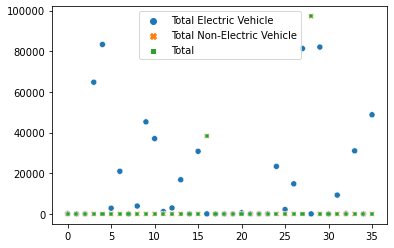

In [10]:
# Select columns for scatter plot and Plot 
scatter_data = data[['Total Electric Vehicle', 'Total Non-Electric Vehicle', 'Total']]
sns.scatterplot(data=scatter_data)
plt.show()

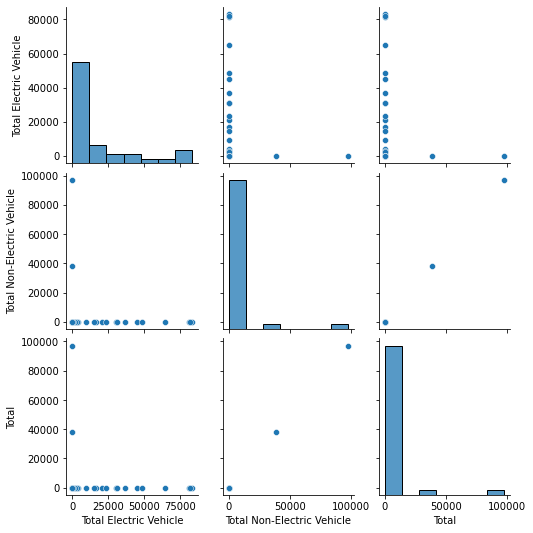

In [11]:
# Exclude 'Sr. No.' column from the dataset and Pair Scatter Plot Grids
columns_to_include = [col for col in data.columns if col != 'Sr. No.']
pairplot_data = data[columns_to_include]
sns.pairplot(pairplot_data)
plt.show()

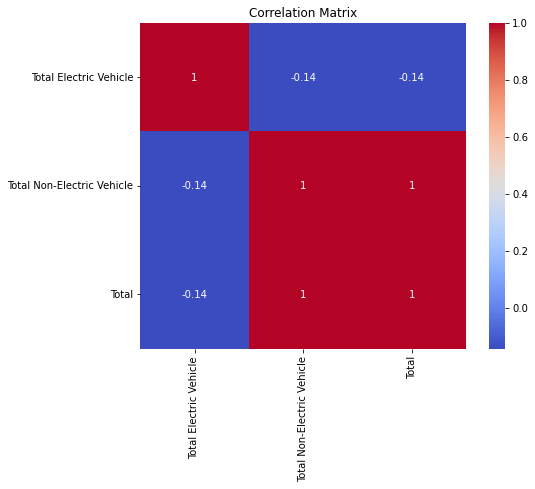

In [12]:
#Correlation Matrix for Numeric Columns
numeric_columns = ['Total Electric Vehicle', 'Total Non-Electric Vehicle', 'Total']
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# EDA Plots

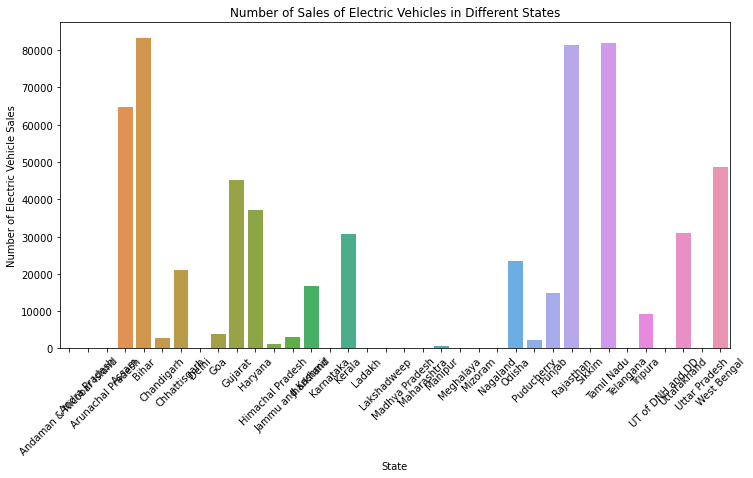

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting number of sales of electric vehicles in different states
plt.figure(figsize=(12, 6))
sns.barplot(x='State Name', y='Total Electric Vehicle', data=data)
plt.title('Number of Sales of Electric Vehicles in Different States')
plt.xlabel('State')
plt.ylabel('Number of Electric Vehicle Sales')
plt.xticks(rotation=45)
plt.show()

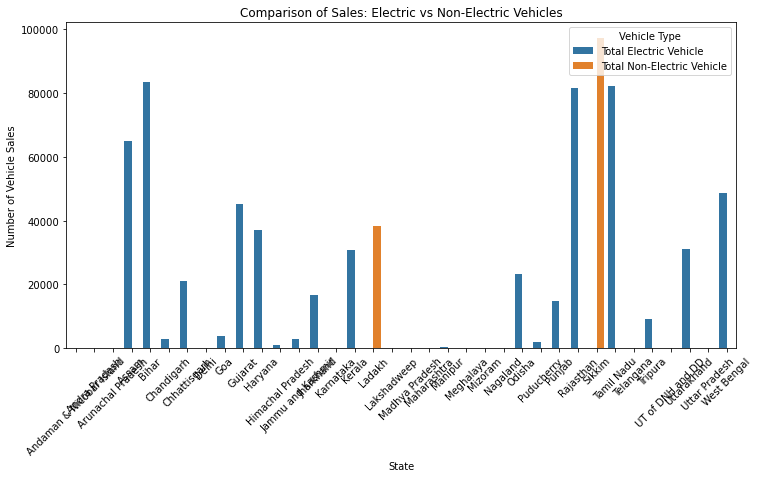

In [19]:
# Create a new dataframe with the required columns
sales_data = data[['State Name', 'Total Electric Vehicle', 'Total Non-Electric Vehicle']].copy()
# Melt the dataframe to create a tidy format for plotting
melted_data = sales_data.melt(id_vars='State Name', var_name='Vehicle Type', value_name='Sales')
# Plotting the comparison of sales between electric and non-electric vehicles
plt.figure(figsize=(12, 6))
sns.barplot(x='State Name', y='Sales', hue='Vehicle Type', data=melted_data)
plt.title('Comparison of Sales: Electric vs Non-Electric Vehicles')
plt.xlabel('State')
plt.ylabel('Number of Vehicle Sales')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type', loc='upper right')
plt.show()


   Total Electric Vehicle  Total Non-Electric Vehicle
0               21.000000                97189.000000
1            31750.625000                    0.000000
2            77872.500000                    0.000000
3             1657.304348                 1665.304348


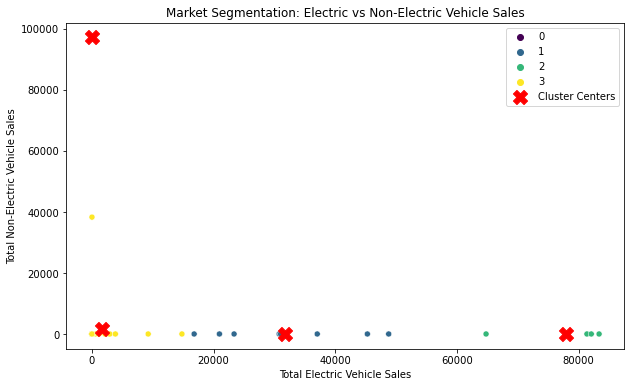

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select the relevant columns for clustering
sales_data = data[['Total Electric Vehicle', 'Total Non-Electric Vehicle']].copy()
sales_data.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Apply k-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_
# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=['Total Electric Vehicle', 'Total Non-Electric Vehicle'])
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total Electric Vehicle', y='Total Non-Electric Vehicle', hue='Cluster', palette='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='red', s=200, label='Cluster Centers')
plt.title('Market Segmentation: Electric vs Non-Electric Vehicle Sales')
plt.xlabel('Total Electric Vehicle Sales')
plt.ylabel('Total Non-Electric Vehicle Sales')
plt.legend()
plt.show()